In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


import the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter as c
from sklearn.metrics import accuracy_score,mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
import pickle
from sklearn.linear_model import LinearRegression

In [ ]:
dataset=pd.read_csv("/content/drive/MyDrive/Vaagdevi/concrete_data")

Reading the dataset

Display the first 5 columns in dataset

In [ ]:
dataset.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


Display the last five columns of dataset

In [ ]:
dataset.tail()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77
1029,260.9,100.5,78.3,200.6,8.6,864.5,761.5,28,32.40


Info the data

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1030 non-null   float64
 1   blast_furnace_slag             1030 non-null   float64
 2   fly_ash                        1030 non-null   float64
 3   water                          1030 non-null   float64
 4   superplasticizer               1030 non-null   float64
 5   coarse_aggregate               1030 non-null   float64
 6   fine_aggregate                 1030 non-null   float64
 7   age                            1030 non-null   int64  
 8   concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [ ]:
dataset.describe()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [ ]:
#Seeing Target,Nomial and numerical columns count

In [ ]:
np.unique(dataset.dtypes,return_counts=True)

(array([dtype('int64'), dtype('float64')], dtype=object), array([1, 8]))

In [ ]:
dataset.dtypes[dataset.dtypes!='0'].index.values

array(['cement', 'blast_furnace_slag', 'fly_ash', 'water',
       'superplasticizer', 'coarse_aggregate', 'fine_aggregate ', 'age',
       'concrete_compressive_strength'], dtype=object)



Checking the null values

In [ ]:
dataset.isnull().any()

cement                           False
blast_furnace_slag               False
fly_ash                          False
water                            False
superplasticizer                 False
coarse_aggregate                 False
fine_aggregate                   False
age                              False
concrete_compressive_strength    False
dtype: bool

In [ ]:
dataset.isnull().sum()

cement                           0
blast_furnace_slag               0
fly_ash                          0
water                            0
superplasticizer                 0
coarse_aggregate                 0
fine_aggregate                   0
age                              0
concrete_compressive_strength    0
dtype: int64

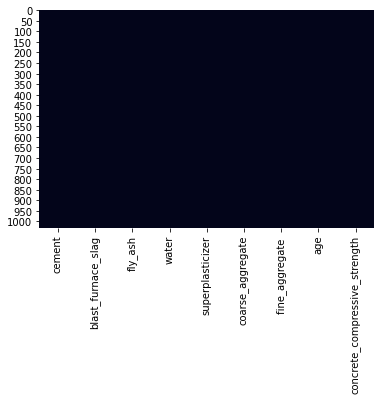

In [ ]:
sns.heatmap(dataset.isnull(),cbar=False)

Finding missing valued

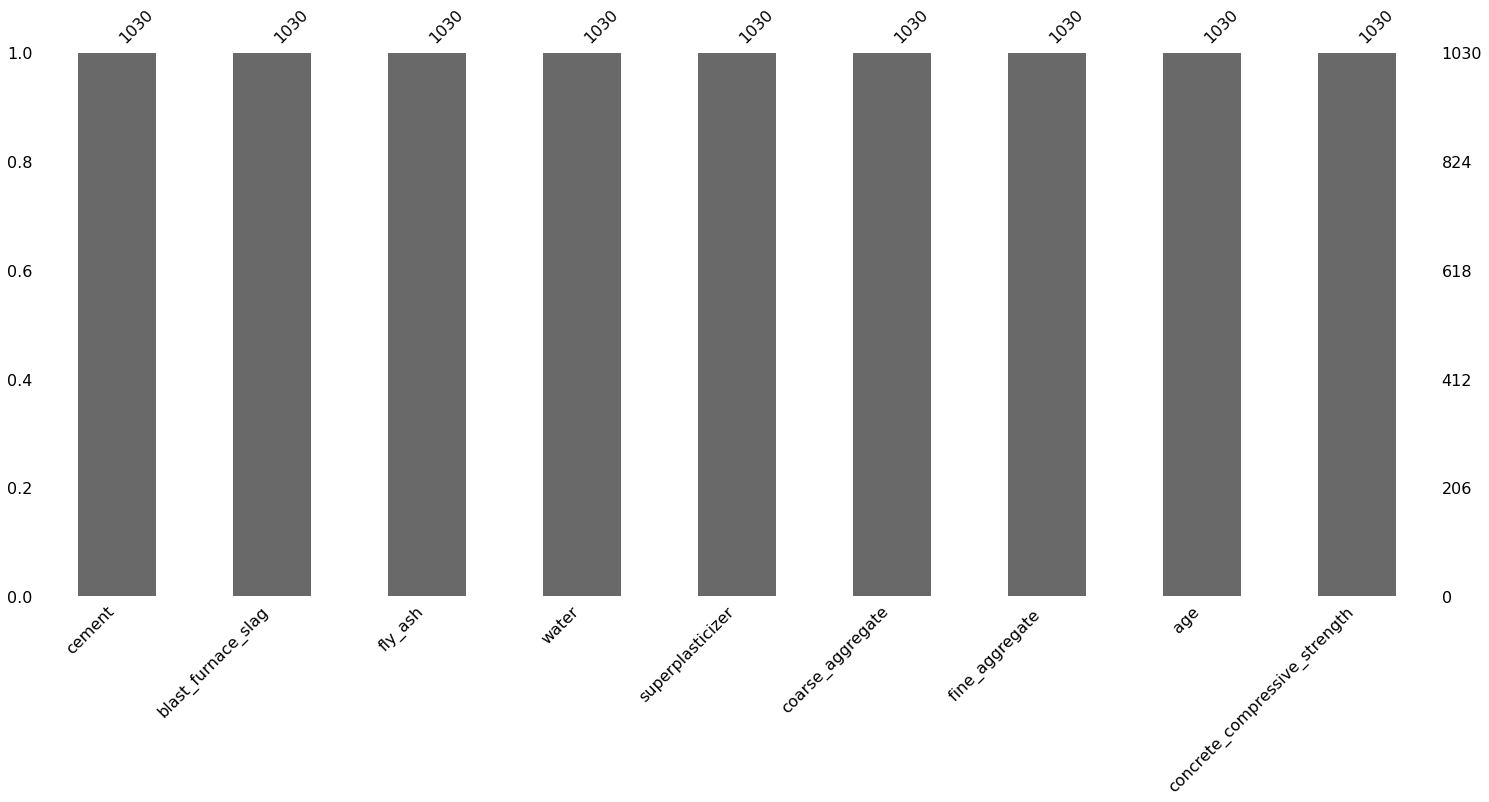

In [ ]:
import missingno as msno
msno.bar(dataset) 
plt.show()

Data visualization

 Checking with Outlier

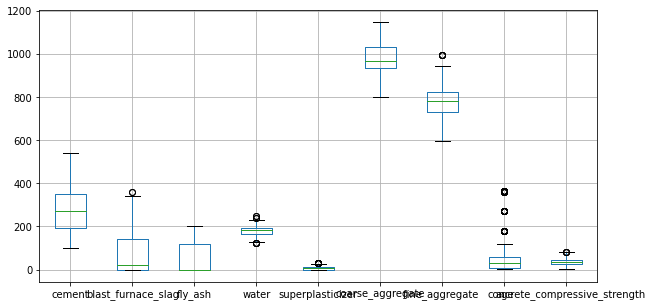

In [ ]:
dataset.boxplot(figsize=(10,5))

In [ ]:
def outliers():
  for i in dataset.columns:
       print("\033[1m"+ i +"\033[0m") 
       Q1=dataset[i].quantile(q=0.25) 
       Q3=dataset[i].quantile(q=0.75)
       print('1st Quartile(Q1) is:',Q1) 
       print('3st Quartile(Q1) is:',Q3)
       IQR=Q3-Q1  # finding inter quartile range
       print(IQR) 
       UL=Q3+(1.5*IQR) #finding upper level point
 
       print("upper limit:", UL) 
       LL=Q1-(1.5*IQR) 
       print("lower limit:", LL)
       print("Outlier present above UL",dataset[i][dataset[i]>UL].count()) 
       print("Outlier present above LL",dataset[i][dataset[i]>LL].count())
       print('------'*40) 
outliers()

cement
1st Quartile(Q1) is: 192.375
3st Quartile(Q1) is: 350.0
157.625
upper limit: 586.4375
lower limit: -44.0625
Outlier present above UL 0
Outlier present above LL 1030
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
blast_furnace_slag
1st Quartile(Q1) is: 0.0
3st Quartile(Q1) is: 142.95
142.95
upper limit: 357.375
lower limit: -214.42499999999998
Outlier present above UL 2
Outlier present above LL 1030
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
fly_ash
1st Quartile(Q1) is: 0.0
3st Quartile(Q1) is: 118.3
118.3
upper limit: 295.75
lower limit: -177.45
Outlier present above UL 0
Outlier present above 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

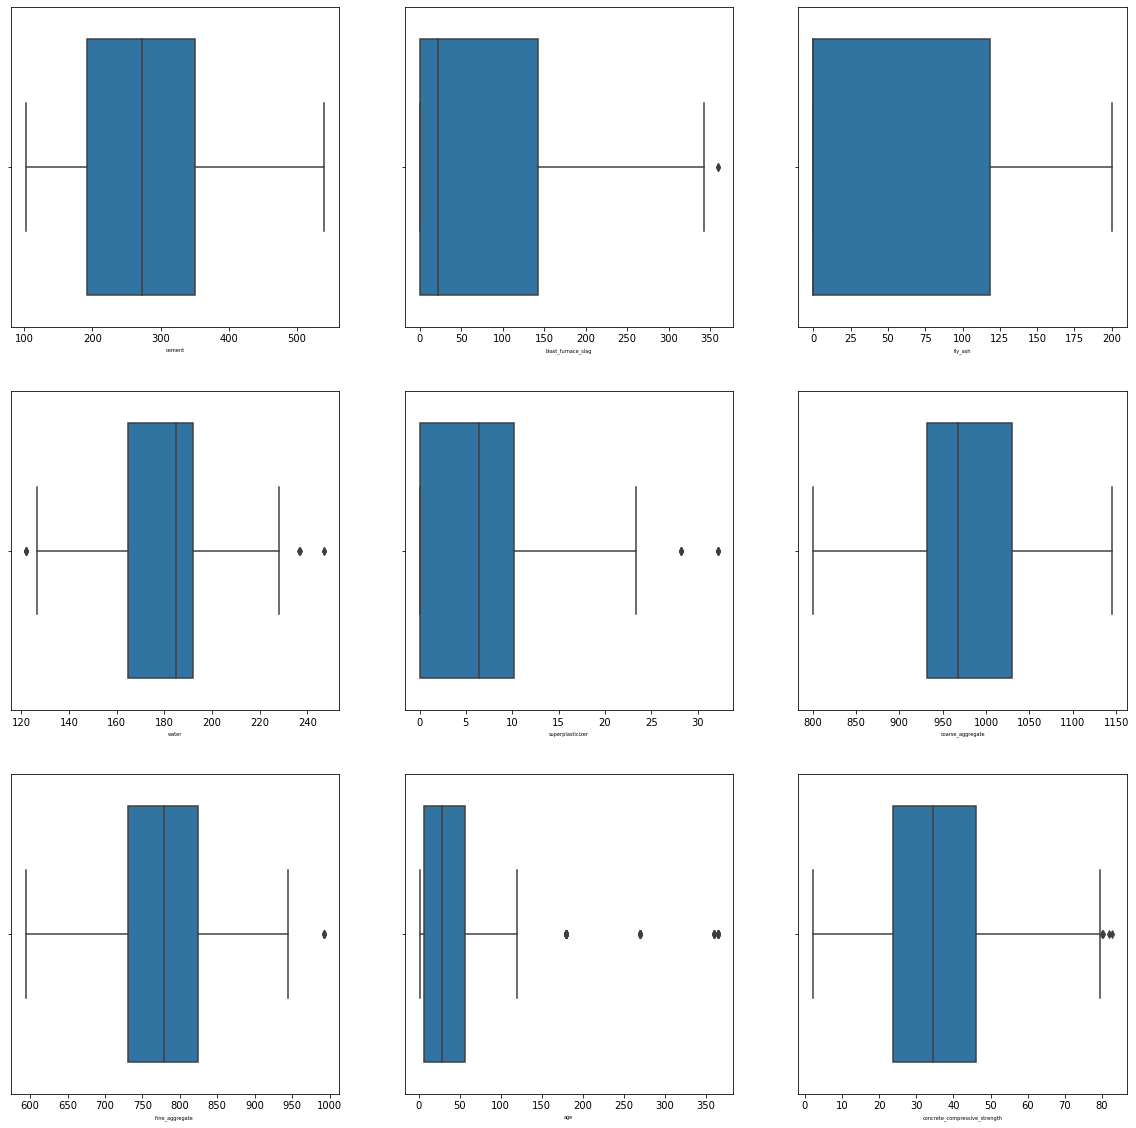

In [ ]:
plt.figure(figsize=(20,20),facecolor='White') 
plotnumber = 1
 
for column in dataset.columns:
    ax=plt.subplot(3,3,plotnumber) 
    sns.boxplot((dataset[column])) 
    plt.xlabel(column,fontsize=5) 
    plotnumber+=1
plt.show()

Scatter plot with target column

In [ ]:
from collections import defaultdict

In [ ]:
y1=dataset['Concrete compressive strength']
plt.figure(figsize=(20,20),facecolor='White') 
plotnumber = 1
 
for column in dataset.columns[:8]:
    ax=plt.subplot(3,3,plotnumber) 
    sns.scatterplot(dataset[column],y1)
    plt.xlabel(column,fontsize=10) 
    plotnumber+=1
plt.show()

KeyError: ignored

 Correlation between the independent columns

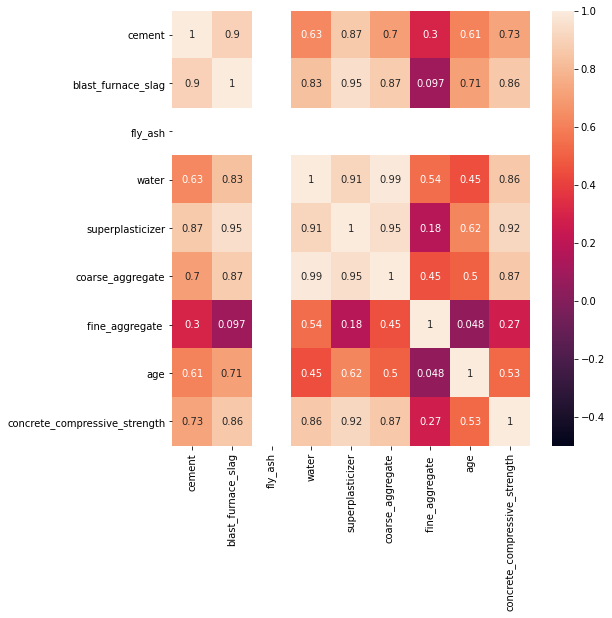

In [ ]:
plt.figure(figsize=(8,8)) 
sns.heatmap(dataset[:8].corr().abs(),vmin=-0.5,vmax=1,annot=True)

Creating the independent and dependent columns

In [ ]:
x=dataset.iloc[ :,0:1].values
y=dataset.iloc[:,2].values

In [ ]:
x

array([[540. ],
       [540. ],
       [332.5],
       ...,
       [148.5],
       [159.1],
       [260.9]])

In [ ]:
y

array([  0. ,   0. ,   0. , ..., 108.6,   0. ,  78.3])

In [ ]:
x.shape

(1030, 1)

Linear regression

 Splitting the data into train and split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)
print(x_train.shape) 
print(y_train.shape)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression() 
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
ypred=lr.predict(x_test) 
ypred

array([ -0.33741267,  93.53703449,  33.83945283,  -5.80969098,
        84.98038112,  29.63574813,  35.48113633,  76.69734167,
       -10.28700961,  38.96349526,  64.83244731,  82.02037603,
        61.84756823,  75.90137391,  -7.30213053,  13.09454321,
        61.39983637,  46.92317281, -10.28700961,  50.48015372,
        27.7701987 ,  60.85260854,  82.49298189, -10.28700961,
        43.19207396,  49.41057205,   7.37352497,  76.5978457 ,
        13.09454321,  55.08184231,  61.84756823,  26.27775916,
        78.28927718,  48.41561236,  39.70971503,  81.00054235,
        29.63574813,  71.17531536,  82.54272987,  75.602886  ,
         5.88108542,  39.70971503,  56.12654999,  80.80155041,
         5.88108542,  18.3180816 ,  24.53657969,  -6.55591075,
        17.69623179,  57.86772945,  53.39041083,  48.9130922 ,
        85.72660089,  61.84756823,  80.80155041,  -1.58111228,
        70.57833955,  13.09454321,  18.3180816 ,  53.39041083,
        29.01389832,  65.87715499,  34.73491656,  30.75

In [ ]:
y_test

array([  0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. , 125.2,   0. ,
         0. ,   0. , 124.3,  95.7,   0. ,   0. ,  79. ,  99.9,   0. ,
         0. ,  95.6,  94. ,   0. , 167. ,   0. ,   0. ,   0. ,   0. ,
       125.4,  79. ,  24.5,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
         0. , 100.4,   0. , 100.5,   0. ,   0. ,  90. , 159.9,  59. ,
         0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. , 112. ,  95.7,
       159.9,  60. , 121.9,  79. ,   0. , 141. ,   0. ,  94.6, 141. ,
         0. ,   0. ,   0. ,  86.1, 194. , 133.6,   0. , 124.3, 125.2,
         0. ,   0. ,   0. ,  79. ,  24.5,   0. ,   0. ,  94.1,   0. ,
        97.4, 121.9, 132.1,  95.6, 113. ,  94. ,  94. , 141.6, 125.4,
       132. ,   0. , 125.2,  99.9, 184. ,   0. , 159.9,  86.5,  94. ,
         0. , 118.6, 123.8,  94.6, 142.7, 124.8,   0. , 117.5, 174.2,
         0. , 106.9,   0. ,   0. ,   0. , 128.6,   0. ,   0. ,   0. ,
         0. ,   0. , 128.6,   0. ,   0. ,   0. ,  95.7, 143. ,   0. ,
         0. ,   0. ,

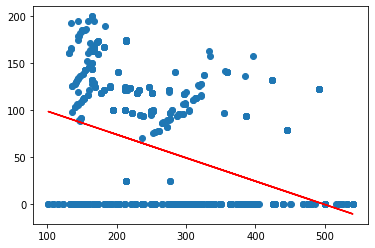

In [ ]:
plt.scatter(x_train,y_train) 
plt.plot(x_train,lr.predict(x_train),color="red")

Accuracy

In [ ]:
from sklearn.metrics import r2_score
accuracy=r2_score(ypred, y_test)

In [ ]:
accuracy

-3.9847626975265715

Predict individual values

In [ ]:
yp=lr.predict([[12]])

In [ ]:
yp

array([121.04767004])

Gradient Boosting Regressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor() 
gbr.fit(x_train,y_train)
GradientBoostingRegressor()

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

 Checking the score with both model

In [ ]:
score=gbr.score(x_test,y_test) 
print("Score of Gradient Boosting Model:",score)

Score of Gradient Boosting Model: 0.5273012198171694


Predicting the output with our build models

In [ ]:
y_pred=gbr.predict(x_test) 
print("prediction made by Gradient Boosting Model:",y_pred)

prediction made by Gradient Boosting Model: [  4.55535715   6.13924944   8.3103414    4.55535715  79.28073
   8.3103414   82.37929306 105.23536101   4.55535715  13.98890572
  24.80482036 127.52490418  85.98171458  64.24831025   4.55535715
  48.30763179  85.98171458  21.66726965   4.55535715  48.65225708
  49.62645024  43.59394437 132.97937578   4.55535715  24.34745937
  54.27582011   6.20388473 105.23536101  48.30763179  51.49524396
  85.98171458  15.31376402  54.08690429  30.68267882  13.98890572
  81.58867692   8.3103414  106.04237365  82.05825569  81.09906633
   6.20388473  13.98890572  51.49524396 134.73851668   6.20388473
   7.4860034   18.04285493   4.55535715   7.4860034   51.49524396
  50.48872022  30.68267882 113.7203904   85.98171458 134.73851668
   4.55535715  96.74659502  48.30763179   7.4860034   50.48872022
   8.3103414   88.03586731  82.37929306   8.3103414   37.0512075
  50.48872022  51.49524396  84.8380084  122.64117005  45.51837856
 127.52490418 105.23536101   7.48600

Polynomial regression

In [ ]:
x=dataset.iloc[:,2:4].values
y=dataset.iloc[:,5].values

In [ ]:
x

array([[540. ],
       [540. ],
       [332.5],
       ...,
       [148.5],
       [159.1],
       [260.9]])

In [ ]:
y

array([  0. ,   0. ,   0. , ..., 108.6,   0. ,  78.3])

Apply linearRegression

In [ ]:
from sklearn.linear_model import LinearRegression
linear=LinearRegression() 
linear.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
ypred=linear.predict(x)

In [ ]:
ypred

array([-8.81107025, -8.81107025, 41.69417151, ..., 86.47954253,
       83.89951572, 59.12152241])

In [ ]:
y

array([  0. ,   0. ,   0. , ..., 108.6,   0. ,  78.3])

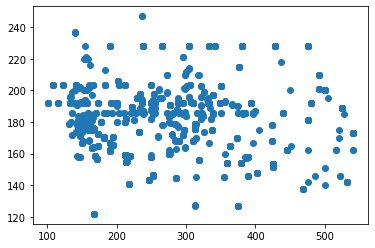

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(dataset["cement"],dataset["water"]) 
plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=4) 
x_poly=poly_reg.fit_transform(x)

In [ ]:
x_poly

array([[1.00000000e+00, 5.40000000e+02, 2.91600000e+05, 1.57464000e+08,
        8.50305600e+10],
       [1.00000000e+00, 5.40000000e+02, 2.91600000e+05, 1.57464000e+08,
        8.50305600e+10],
       [1.00000000e+00, 3.32500000e+02, 1.10556250e+05, 3.67599531e+07,
        1.22226844e+10],
       ...,
       [1.00000000e+00, 1.48500000e+02, 2.20522500e+04, 3.27475912e+06,
        4.86301730e+08],
       [1.00000000e+00, 1.59100000e+02, 2.53128100e+04, 4.02726807e+06,
        6.40738350e+08],
       [1.00000000e+00, 2.60900000e+02, 6.80688100e+04, 1.77591525e+07,
        4.63336289e+09]])

In [ ]:
poly_reg.fit(x_poly,y)

PolynomialFeatures(degree=4, include_bias=True, interaction_only=False,
                   order='C')

In [ ]:
y

array([  0. ,   0. ,   0. , ..., 108.6,   0. ,  78.3])

In [ ]:
polynomial=LinearRegression() 
polynomial.fit(x_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
polypred=polynomial.predict(x_poly) 
polypred
y

array([  0. ,   0. ,   0. , ..., 108.6,   0. ,  78.3])

Accuracy

In [ ]:
from sklearn.metrics import r2_score
lraccuracy=r2_score(polypred,y) 
polyacc=r2_score(polypred,y)

In [ ]:
lraccuracy

-2.297489460998228

In [ ]:
polyacc

-2.297489460998228

Random forest algorithm

In [ ]:
from sklearn.ensemble import RandomForestRegressor
d=RandomForestRegressor(n_estimators=10,random_state=0) 
d.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
ypred=d.predict(x_test)

In [ ]:
ypred

array([-8.81107025, -8.81107025, 41.69417151, ..., 86.47954253,
       83.89951572, 59.12152241])

In [ ]:
y_test

array([  0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. , 125.2,   0. ,
         0. ,   0. , 124.3,  95.7,   0. ,   0. ,  79. ,  99.9,   0. ,
         0. ,  95.6,  94. ,   0. , 167. ,   0. ,   0. ,   0. ,   0. ,
       125.4,  79. ,  24.5,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
         0. , 100.4,   0. , 100.5,   0. ,   0. ,  90. , 159.9,  59. ,
         0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. , 112. ,  95.7,
       159.9,  60. , 121.9,  79. ,   0. , 141. ,   0. ,  94.6, 141. ,
         0. ,   0. ,   0. ,  86.1, 194. , 133.6,   0. , 124.3, 125.2,
         0. ,   0. ,   0. ,  79. ,  24.5,   0. ,   0. ,  94.1,   0. ,
        97.4, 121.9, 132.1,  95.6, 113. ,  94. ,  94. , 141.6, 125.4,
       132. ,   0. , 125.2,  99.9, 184. ,   0. , 159.9,  86.5,  94. ,
         0. , 118.6, 123.8,  94.6, 142.7, 124.8,   0. , 117.5, 174.2,
         0. , 106.9,   0. ,   0. ,   0. , 128.6,   0. ,   0. ,   0. ,
         0. ,   0. , 128.6,   0. ,   0. ,   0. ,  95.7, 143. ,   0. ,
         0. ,   0. ,

Finding Accuracy

In [ ]:
from sklearn.metrics import r2_score
accuracy=r2_score(ypred,x_test)

In [ ]:
accuracy

-22.652540612549103

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer([],remainder="passthrough") 
x=ct.fit_transform(x)

Pickle file creation

In [ ]:

import pickle
pickle.dump(gbr,open('cement.pkl','wb'))

In [ ]:
from joblib import dump
dump(gbr,'gbr.save')

['gbr.save']